# Neural Networks

## Objectives

Morning Objectives: 
* Build intuition with neural nets
* Describe a neural net 
* A directional graph
* An ensemble of regressions
* Latent feature detection
* Use back propagation and activation functions in NNs

Afternoon Objectives
* Build a simple neural network in keras.
* Regularize a neural network.
* Explain other neural network architectures.

Let's start off with imports. I'll go back to describing why so many imports this afternoon!

In [1]:
import keras
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mark.llorente/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## What are Neural Networks?

Neural Networks were originally developed in the 1950's using the neurons in the brain as inspiration.

In the brain, we have neurons connected together by dendrons of different strengths, and the strengths of the connections change as we learn. The connections are non-linear; a neural doesn't activate at all until it has sufficient input.

But don't get too caught up in the analogy. Brains are an inspiration, not a model, and trying to fit to closely to them hasn't always helped researchers.

### Terminology

I'm using the term 'neural network' throughout the lecture. The term 'deep learning' has become popular as well in recent years, in part to move away from the idea that these are based on the brain, and in part to emphasize the depth that's become possible. Sometimes people talk about 'artificial neural networks' to distinguish them from the biological ones. 

## Why Neural Networks?

In general, neural networks perform well with high-dimensional data such as images, audio, and text.

Question: why are these high dimensional?

Disadvantages

 * Hard to design and tune
 * Seriously, really hard to design and tune sometimes taking a couple days just to get that first reliable convergence (approach to a good fit)
 * Slow to train
 * Many local minima
 * Uninterpretable
 * Easy to overfit (need a lot of data)
 
Advantange

 * Works well with high-dimensional data
 * Can find almost anything, when designed correctly
 * Online training

## History

Stage 1: ('40s-'60s) Early understanding of the brain and development of computers ('40s-'60s)

Stage 2: ('80s-'90s) Understanding of backpropagation, recognition that neural networks could be used for associative memory, first recurrent neural networks

Stage 3: (2006-) Growth of GPUs, better algorithms for training deep networks, more designs, more data


## Neural networks

A neural network can be expressed as a directed graph. The nodes of the graph are neurons. Neurons can either be **input**, **hidden**, or **output** neurons. The input nodes are set to the feature, and (once all the calcuations are done) the value of the output nodes will be the predicted labels.

The connections between the neurons are either **weights** or **activation functions**. If the connections into a neuron are weights, then the value for that neuron is the sum over all incoming connects of the weight times the value of the previous neuron.

<img src="img/2-1.png" alt="1-layer network" style="height: 180px;"/>

Here we have two input nodes ($x_1$ and $x_2$), a single output node ($y$), and weights between them ($W_1$ and $W_2$). So here

$$y = W_1 x_1 + W_2 x_2$$

Question: does that look familiar?

To find the best values for the weights, we need to train the model. This is done with some sort of gradient descent to minimize the error in predicting the training data. In this case we might define the error (the *loss function*) as the sum of squares of the difference of actual and predicted values of y.

The other option for a connection is an activation function. Here the value of a node is simply some fixed function of the of the previous node. There are a number of common ones; one of these is a the logistic function. Sometimes the term sigmoid function is used instead, though some (i.e., myself) use "sigmoid" to mean any function that sort of looks like that.

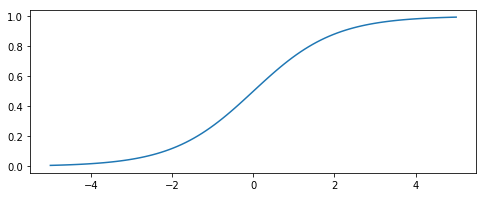

In [2]:
def logistic(x):
    return 1/(1+np.exp(-x))

xpts = np.linspace(-5, 5, 100)
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(xpts, logistic(xpts))

Let's add that in, along with a constant intercept term.

<img src="img/2-1-logit.png" alt="1-layer network" style="height: 300px;"/>

We could write that as

$$y = \frac{1}{1 + e^{-(W_1 x_1 + W_2 x_2 + b)}}$$

Question: does that look familiar?

Again, to find the best weights we use something like gradient descent, though if we want to use it to predict something is in one class or another, we'd use log loss (a.k.a. cross entropy) as our loss function.

Question: could we use accuracy as a loss function?

### Hidden layers

So far we haven't done anything new. Neural networks are more powerful if we introduce additional layers.

<img src="img/2-2-1-logit.png" alt="2-layer network" style="height: 400px;"/>

The nodes $h_1$ and $h_2$ are called hidden nodes.
Now we have a bunch of terms to fit, weights for each connection plus intercept terms.

Discussion: Do we need to have a logistic term at each before the hidden layers? What would happen if we left those off?



## Fully Connected Networks

Much of the challenge of creating neural networks is deciding how to organize the nodes. The simplest type is called a **fully connected network**, in which nodes are organized into layers. Each layer (after the input) is a fully connected layer, with each of its nodes connected to the each node in the previous. Each layer may have an associated activation function, which is used for each node in the layer.

The more hidden layers a network has, the more powerful it is and the more it can predict. But it will also be slower to train and easier to overfit.

## Backpropagation

Calculating the output based on the inputs is sometimes called **forward propagation**, in which the signal is propagated from one layer to the next. To update the weights in the model we use an algorithm called **backpropagation**. In this, we compare the predicted output with the expected value for a set of inputs to find the output error, and propagate the error backwards, from one layer to the previous one, based on the gradient of the intervening functions and weights. Once we have the error at each node we can use gradient descent or some related algorithm to adjust the weights at that node.

We aren't going to do that manually, but if you're interested Jeff's lecture at https://github.com/gSchool/DSI_Lectures/blob/master/neural-network/jfomhover/Perceptron%20-%20Notes%20-%20v3.ipynb does a great job exploring that in more detail. TensorFlow (or any other NN framework) all take care of that automatically.

That said, it's an important algorithm that was critical to the development of NN and at some point it's worth studying.

## Activation functions

Above we used a logistic function for our activation function. In the past that was the most popular activation function, for a couple reasons. First, it's differentiable everywhere. Second, the finite range was seen as a model for the activation of neurons in the brain. Both of these were seen as Good Things.

It turns out neither was that important, and today the ReLU function is generally more popular.

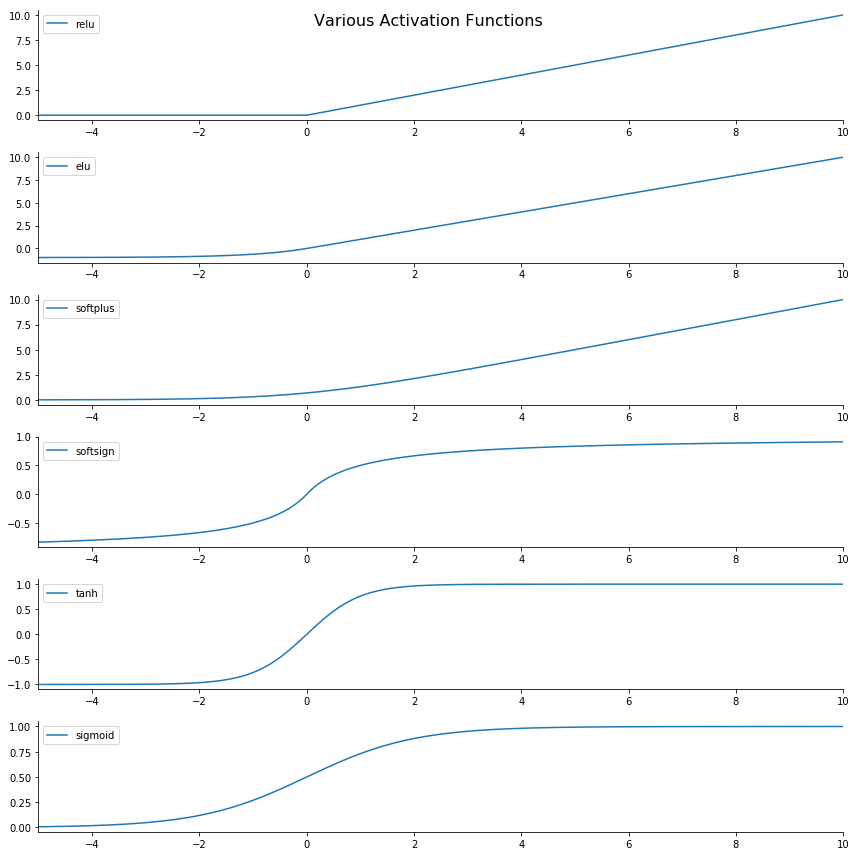

In [3]:
xpts = np.linspace(-5, 10, 500)
#xpts = tf.convert_to_tensor(xpts) 
sess = tf.InteractiveSession()
functions = [keras.backend.relu,
             keras.backend.elu,
             keras.backend.softplus,
             keras.backend.softsign,
             keras.backend.tanh,
             keras.backend.sigmoid            ]

fig,axes = plt.subplots(len(functions), figsize=(12,12))

for ax, func in zip(axes, functions):
    ax.plot(xpts, func(xpts).eval(), label=func.__name__)
    ax.legend(loc='upper left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(xpts.min(), xpts.max())

fig.suptitle('Various Activation Functions', fontsize=16)
fig.tight_layout()

Another activation function you sometimes see is the softmax function, mostly for the output layer of a network doing multi-class classification. It has the same number of inputs as outputs, converting the inputs into probabilities.

# Afternoon Lecture: Keras

This morning we experimented with a simple neural network built with numpy. This afternoon we'll use `keras`, a powerful and easy-to-use python library for creating neural networks. It can run on top of either of a couple of backends, TensorFlow (from Google) and Theano.

Let's start making a simple predictive model, on some data we can understand. Usually neural networks are used for fancier stuff, but this is just a simple 1-feature regression problem.

In [4]:
npts = 1000
x_train = scs.uniform(-5, 10).rvs(npts)
y_train = np.sin(x_train) + scs.norm(0, 1.0).rvs(npts)

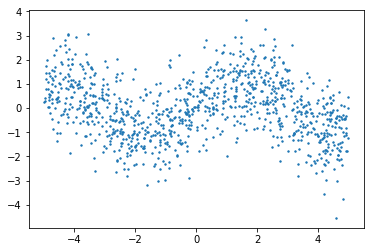

In [5]:
fig,ax = plt.subplots()
ax.scatter(x_train, y_train, s=2)

The basic object in keras is called a `model`; you create a model first and add layers onto it. The simplest one to use is a `Sequential` model, which is just a bunch of layers. Let's make one of those.

In [6]:
model = Sequential()

To start off we'll make the simplest network we can, without any hidden layers, just a single output layer. We need to specify the number of `units` in that layer (1) as well as the number of input units with `input_dim` (also 1).

In [7]:
model.add(Dense(units=1, input_dim=1))

That's it - we built a neural network! Now we compile it (specifying `loss` function and other things).

In [8]:
model.compile(loss='mean_squared_error',
             optimizer='sgd')

Finally, we fit the model. We train the data in batches of multiple points at once, running through the entire dataset (epochs) several times.

In [9]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1000/1000 [==============================] - 0s 73us/step - loss: 1.4902
Epoch 2/5
1000/1000 [==============================] - 0s 21us/step - loss: 1.4963
Epoch 3/5
1000/1000 [==============================] - 0s 22us/step - loss: 1.4935
Epoch 4/5
1000/1000 [==============================] - 0s 23us/step - loss: 1.4920
Epoch 5/5
1000/1000 [==============================] - 0s 23us/step - loss: 1.4916


Let's make a picture!

Our data only range from -5 to 5, but we'll plot a bit beyond that. We'll make a function since we'll do this a few times.

In [10]:
def plot_results(model, ax=None, function=np.sin, xlim=(-7, 7)):
    x_actual = np.linspace(*xlim, 500)
    y_actual = function(x_actual)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 5))

    y_pred = model.predict(x_actual)
    ax.plot(x_actual,y_pred, 'r-', label='model predictions')
    ax.plot(x_actual,y_actual, 'b-', lw=0.3, label='actual expected values')

    ax.axvline(-5, color='k', label='limits of data')
    ax.axvline(5, color='k')
    ax.set_xlim(xlim)
    ax.legend()  

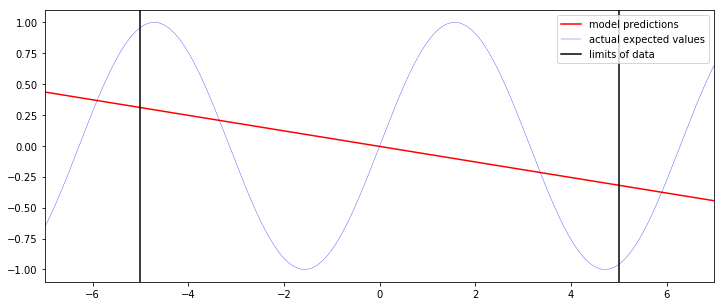

In [11]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model, ax=ax)

So we basically just did linear regression.

Let's make a new model.

In [12]:
model_hidden_layer = Sequential()

Now we'll add a layer to it, taking us from a single input unit to 5 hidden units.

In [13]:
n_hidden = 5
model_hidden_layer.add(Dense(units=n_hidden, input_dim=1))

A second layer will connect use to the output with a single output value. Note we do not need to specify the `input_dim` since it's inferred from the previous layer.

In [14]:
model_hidden_layer.add(Dense(units=1))

We then compile the model and fit it, as before, and plot the results.

Epoch 1/40
1000/1000 [==============================] - 0s 70us/step - loss: 1.5026
Epoch 2/40
1000/1000 [==============================] - 0s 25us/step - loss: 1.5019
Epoch 3/40
1000/1000 [==============================] - 0s 29us/step - loss: 1.4970
Epoch 4/40
1000/1000 [==============================] - 0s 30us/step - loss: 1.5086
Epoch 5/40
1000/1000 [==============================] - 0s 30us/step - loss: 1.5240
Epoch 6/40
1000/1000 [==============================] - 0s 28us/step - loss: 1.4927
Epoch 7/40
1000/1000 [==============================] - 0s 32us/step - loss: 1.5079
Epoch 8/40
1000/1000 [==============================] - 0s 29us/step - loss: 1.4952
Epoch 9/40
1000/1000 [==============================] - 0s 32us/step - loss: 1.5065
Epoch 10/40
1000/1000 [==============================] - 0s 27us/step - loss: 1.5004
Epoch 11/40
1000/1000 [==============================] - 0s 28us/step - loss: 1.5008
Epoch 12/40
1000/1000 [==============================] - 0s 26us/step - lo

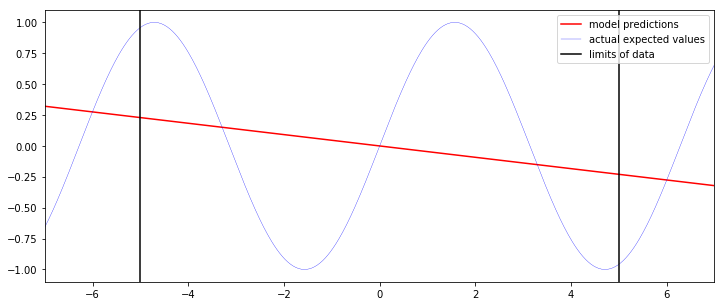

In [15]:
model_hidden_layer.compile(loss='mean_squared_error',
             optimizer='sgd')
model_hidden_layer.fit(x_train, y_train, epochs=40, batch_size=32)
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_hidden_layer, ax=ax)

That was disappointing.

What went wrong?

### Activation units

The problem is that our network is completely linear, so no matter what the weights the output is a linear function of the input. In order to fix this, we need to provide some sort of non-linear function at each of the layers.

To add an activation function in keras, we just add it as an additional layer.

In [16]:
model_activation = Sequential()
n_hidden = 5
model_activation.add(Dense(units=n_hidden, input_dim=1))
model_activation.add(Activation('relu'))
model_activation.add(Dense(units=1))
model_activation.compile(loss='mean_squared_error',
             optimizer='sgd')

In [17]:
model_activation.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
1000/1000 [==============================] - 0s 75us/step - loss: 1.6729
Epoch 2/40
1000/1000 [==============================] - 0s 23us/step - loss: 1.4815
Epoch 3/40
1000/1000 [==============================] - 0s 31us/step - loss: 1.4675
Epoch 4/40
1000/1000 [==============================] - 0s 27us/step - loss: 1.4604
Epoch 5/40
1000/1000 [==============================] - 0s 29us/step - loss: 1.4524
Epoch 6/40
1000/1000 [==============================] - 0s 26us/step - loss: 1.4496
Epoch 7/40
1000/1000 [==============================] - 0s 21us/step - loss: 1.4385
Epoch 8/40
1000/1000 [==============================] - 0s 27us/step - loss: 1.4311
Epoch 9/40
1000/1000 [==============================] - 0s 27us/step - loss: 1.4192
Epoch 10/40
1000/1000 [==============================] - 0s 26us/step - loss: 1.4096
Epoch 11/40
1000/1000 [==============================] - 0s 31us/step - loss: 1.3999
Epoch 12/40
1000/1000 [==============================] - 0s 32us/step - lo

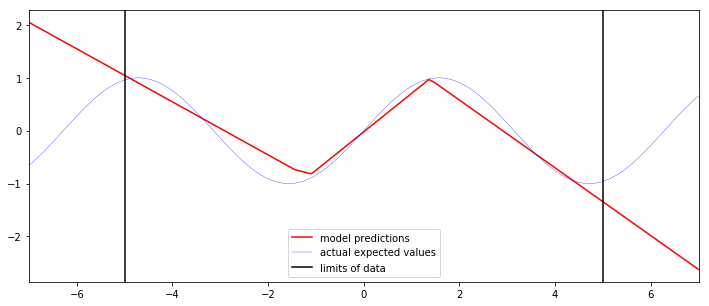

In [18]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)

Question: what are those sharp edges?

We can experiment with different activations and number of hidden units. To simplify the specification, the activation layer can be included in the layer before it.
    

In [19]:
model_activation = Sequential()
n_hidden = 20
model_activation.add(Dense(units=n_hidden, input_dim=1, activation='sigmoid'))
model_activation.add(Dense(units=1))
model_activation.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])

In [20]:
model_activation.fit(x_train, y_train, epochs=80, batch_size=32)

Epoch 1/80
1000/1000 [==============================] - 0s 89us/step - loss: 1.5038 - acc: 0.0000e+00
Epoch 2/80
1000/1000 [==============================] - 0s 24us/step - loss: 1.4877 - acc: 0.0000e+00
Epoch 3/80
1000/1000 [==============================] - 0s 31us/step - loss: 1.4832 - acc: 0.0000e+00
Epoch 4/80
1000/1000 [==============================] - 0s 31us/step - loss: 1.4833 - acc: 0.0000e+00
Epoch 5/80
1000/1000 [==============================] - 0s 26us/step - loss: 1.4816 - acc: 0.0000e+00
Epoch 6/80
1000/1000 [==============================] - 0s 27us/step - loss: 1.4769 - acc: 0.0000e+00
Epoch 7/80
1000/1000 [==============================] - 0s 30us/step - loss: 1.4724 - acc: 0.0000e+00
Epoch 8/80
1000/1000 [==============================] - 0s 32us/step - loss: 1.4764 - acc: 0.0000e+00
Epoch 9/80
1000/1000 [==============================] - 0s 30us/step - loss: 1.4686 - acc: 0.0000e+00
Epoch 10/80
1000/1000 [==============================] - 0s 28us/step - loss: 1.46

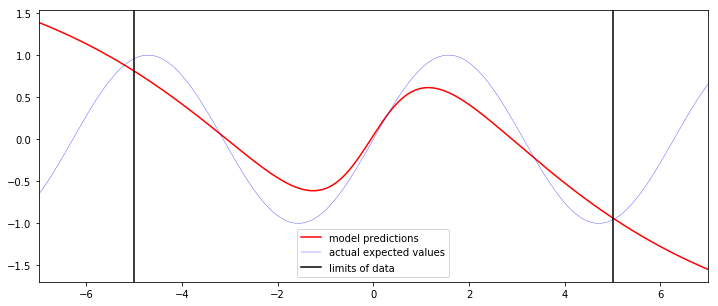

In [21]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)

## Regularization

Since neural networks (particularly fully connected networks) have a large number of parameters, they are fairly easy to overfit. This is most serious in situations in which we have more features than data.

Question: is that the case here?

Question: what's an example of such a problem?

To avoid this most neural networks include some sort of regularization. There are a number of different approaches.

### Dropout

The most popular approach is adding dropout layers. A dropout layer has no effect during prediction, acting like an identity matrix, but during training a nodes fail randomly. This forces the network to include redundancy.

It won't make much of a different here, but this is what it would look like in keras.

In [22]:
model_activation = Sequential()
n_hidden = 10
model_activation.add(Dense(units=n_hidden, input_dim=1, activation='sigmoid'))
model_activation.add(Dense(units=1))
model_activation.add(Dropout(rate=0.5))
model_activation.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])

In [23]:
model_activation.fit(x_train, y_train, epochs=400, batch_size=32)

Epoch 1/400
1000/1000 [==============================] - 0s 117us/step - loss: 1.6397 - acc: 0.0000e+00
Epoch 2/400
1000/1000 [==============================] - 0s 29us/step - loss: 1.5086 - acc: 0.0000e+00
Epoch 3/400
1000/1000 [==============================] - 0s 25us/step - loss: 1.4955 - acc: 0.0000e+00
Epoch 4/400
1000/1000 [==============================] - 0s 29us/step - loss: 1.4953 - acc: 0.0000e+00
Epoch 5/400
1000/1000 [==============================] - 0s 34us/step - loss: 1.4868 - acc: 0.0000e+00
Epoch 6/400
1000/1000 [==============================] - 0s 34us/step - loss: 1.4761 - acc: 0.0000e+00
Epoch 7/400
1000/1000 [==============================] - 0s 33us/step - loss: 1.4722 - acc: 0.0000e+00
Epoch 8/400
1000/1000 [==============================] - 0s 34us/step - loss: 1.4713 - acc: 0.0000e+00
Epoch 9/400
1000/1000 [==============================] - 0s 37us/step - loss: 1.4639 - acc: 0.0000e+00
Epoch 10/400
1000/1000 [==============================] - 0s 31us/step -

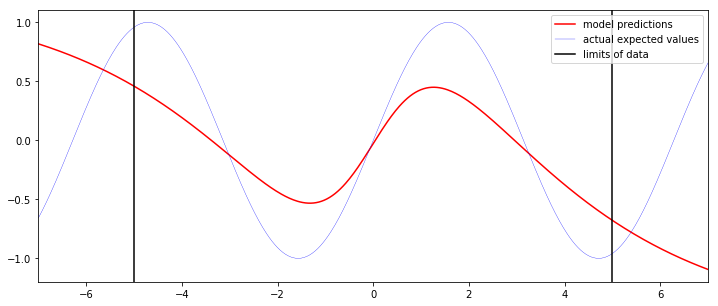

In [24]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)

### L1/L2 Regularization

Another approach to reducing overfitting is the same sort of L1 or L2 regularlization on the connection weights or on the node values; these have similar effect to a linear model. Keras allow `kernel_regularizer` and `activity_regularizer` parameters when creating layers.


### Parameter Sharing

Another approach is tying some of the weights together, by imposing a penalty based on the differences between certain parameters. The extreme example of this is **parameter sharing**. For this we require many of the parameters to be the same. One example of this is  **convolutional neural networks** which are used to process images and other data with some form of translational invariance.

In CNNs, the pixels of an image are mapped to multiple channels of the same size, with weights connecting the images in the input to the pixels of each of the output channels. However, pixels are only connected to nearby pixels in the output (typically, in a 5x5 region) and the parameters corresponding to the same offset (e.g., (+1, -2)) are force to be identical. This allows translational invariance.

Other networks that uses parameter sharing are **recurrent neural networks**, which are used for time-series data. Unlike ordinary neural networks which have a single feedforward step, RNNs are executed in an arbitrary number of steps, with output or hidden units feeding back into earlier units in the network, and the input added sequentially at each step. Training these involves unwinding them in time, so parameters are shared across time rather than space. A particularly effective form of RNN is a Long Short Term Memory network or **LSTM**; [here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) is a good explanation.

## Autoencoders

## *WARNING TO LECTURER, THE FOLLOWING CELLS WILL CAUSE YOUR COMPUTER TO RUN FOR A WHILE AND GET VERY WARM EVEN WITH A V GOOD GRAPHICS CARD*

Neural networks can be used for things other than simple supervised learning. One other example is an autoencoder, which attemps to create a low-dimensional representation of data. We'll do this by creating a multi-layer network, with one of the hidden layers having a small number of nodes and train it to predict the input data. As an example dataset, we'll use the MNIST digits which you'll use in the afternoon exercise.

In [25]:
from keras.datasets import mnist

In [26]:
def one_hotify(y, n_classes=None):
    'Only works for 1-d so far'
    if n_classes is None:
        n_classes = y.max() + 1
    result = np.zeros(y.shape + (n_classes,))
    result[range(y.shape[0]), y] = 1
    return result

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
Xtrain = X_train.reshape(-1, 28*28)/255
Xtest = X_test.reshape(-1, 28*28)/255
ytrain = one_hotify(y_train)
ytest = one_hotify(y_test)

In [28]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=28*28))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation='linear', name='bottleneck'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=784, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam')

In [29]:
encoder = Model(model.input, model.get_layer('bottleneck').output)

In [30]:
model.fit(Xtrain, Xtrain, epochs=200, batch_size=1024)

Epoch 1/200
60000/60000 [==============================] - 3s 43us/step - loss: 619.3221
Epoch 2/200
60000/60000 [==============================] - 2s 41us/step - loss: 594.1352
Epoch 3/200
60000/60000 [==============================] - 2s 39us/step - loss: 587.3484
Epoch 4/200
60000/60000 [==============================] - 2s 37us/step - loss: 582.5819
Epoch 5/200
60000/60000 [==============================] - 2s 37us/step - loss: 579.9375
Epoch 6/200
60000/60000 [==============================] - 2s 38us/step - loss: 577.8116
Epoch 7/200
60000/60000 [==============================] - 3s 44us/step - loss: 575.1044
Epoch 8/200
60000/60000 [==============================] - 2s 40us/step - loss: 572.1279
Epoch 9/200
60000/60000 [==============================] - 2s 40us/step - loss: 569.8180
Epoch 10/200
60000/60000 [==============================] - 2s 39us/step - loss: 567.8958
Epoch 11/200
60000/60000 [==============================] - 2s 40us/step - loss: 566.3238
Epoch 12/200
60000/

In [31]:
representations = encoder.predict(Xtrain)

In [32]:
markers = ['${}$'.format(d) for d in y_train]
markers = np.array(markers)

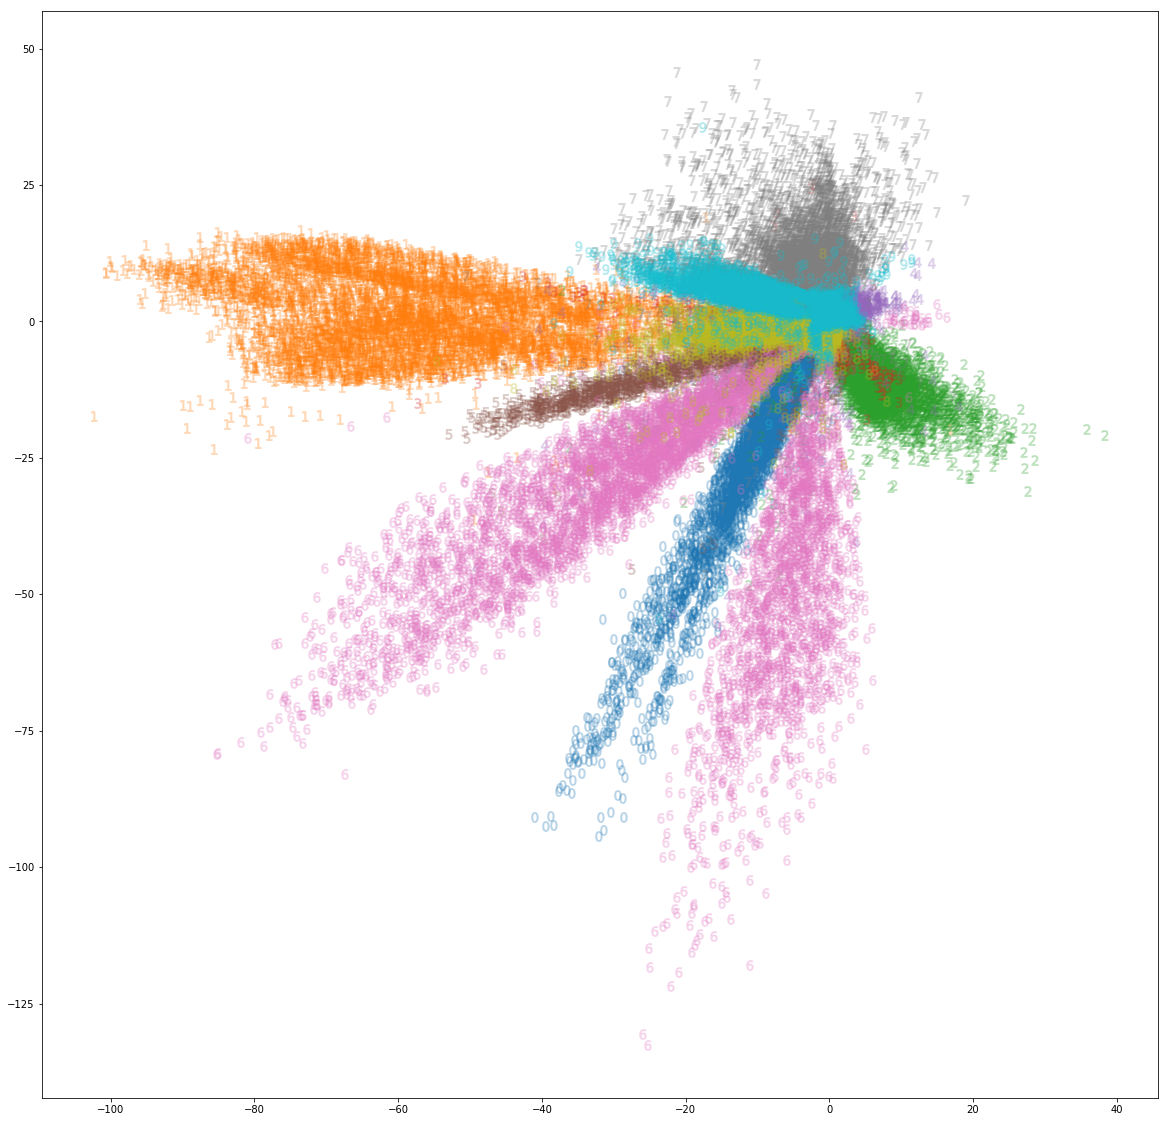

In [33]:
fig, ax = plt.subplots(figsize=(20, 20))
for d in range(10):
    ax.scatter(representations[y_train==d, 0],
               representations[y_train==d, 1],
               marker="${}$".format(d), s=100, alpha=.2)